### Marketing Analysis ###

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [11]:
# Set the style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# 1. Import and validate data

In [13]:
df = pd.read_csv('marketing_data.csv')

In [14]:
# Clean column names - strip whitespace
df.columns = df.columns.str.strip()

In [15]:
# Check Dt_Customer and Income for accurate importation
print("\nChecking Dt_Customer format:")
print(df['Dt_Customer'].head())


Checking Dt_Customer format:
0    6/16/14
1    6/15/14
2    5/13/14
3    5/11/14
4     4/8/14
Name: Dt_Customer, dtype: object


In [16]:
print("\nChecking Income format:")
print(df['Income'].head())


Checking Income format:
0    $84,835.00 
1    $57,091.00 
2    $67,267.00 
3    $32,474.00 
4    $21,474.00 
Name: Income, dtype: object


# 2. Data Cleaning and Missing Value Imputation

1. Validated data import formats for Dt_Customer and Income
2. Cleaned column names by stripping whitespace
3. Standardized education categories: Graduation, PhD, Master, 2n Cycle, Basic
4. Standardized marital status categories: Married, Together, Single, Divorced, Widow, Other
5. Successfully imputed missing income values based on education and marital status groups

In [18]:
# Clean up Income column (remove spaces and convert to numeric)
df['Income'] = df['Income'].str.replace('$', '').str.replace(',', '').astype(float)

In [19]:
# Check for missing values
print("\nMissing values count:")
print(df.isnull().sum())


Missing values count:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


In [20]:
# Check education and marital status categories
print("\nEducation categories:")
print(df['Education'].value_counts())


Education categories:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [21]:
print("\nMarital Status categories:")
print(df['Marital_Status'].value_counts())


Marital Status categories:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64


In [22]:
# Clean education and marital status categories
# Standardize education categories
education_mapping = {
    'Graduation': 'Graduation',
    'PhD': 'PhD',
    'Master': 'Master',
    'Basic': 'Basic',
    '2n Cycle': '2n Cycle'
}
df['Education'] = df['Education'].map(education_mapping)

In [23]:
# Standardize marital status categories
marital_mapping = {
    'Single': 'Single',
    'Together': 'Together',
    'Married': 'Married',
    'Divorced': 'Divorced',
    'Widow': 'Widow',
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd': 'Other'
}
df['Marital_Status'] = df['Marital_Status'].map(marital_mapping)

In [24]:
print("\nCleaned Education categories:")
print(df['Education'].value_counts())


Cleaned Education categories:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [25]:
print("\nCleaned Marital Status categories:")
print(df['Marital_Status'].value_counts())


Cleaned Marital Status categories:
Marital_Status
Married     864
Together    580
Single      485
Divorced    232
Widow        77
Other         2
Name: count, dtype: int64


In [26]:
# Group by education and marital status to get mean income
income_means = df.groupby(['Education', 'Marital_Status'])['Income'].transform('mean')
df['Income'].fillna(income_means, inplace=True)

/var/folders/cx/v9bftl1s4qvfj96ddnylpl_80000gn/T/ipykernel_3204/4186672419.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(income_means, inplace=True)


In [27]:
# Check if any missing values remain
print("\nRemaining missing values after imputation:")
print(df.isnull().sum())


Remaining missing values after imputation:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64


### 3. Feature Engineering ###

1. Created total children variable by combining Kidhome and Teenhome
2. Calculated customer age based on birth year (as of 2023)
3. Calculated total spending across all product categories
4. Derived total purchases across all channels (web, catalog, store)
5. Added customer tenure in days

In [28]:
# Create total children variable
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

In [29]:
# Calculate customer age (as of 2023)
df['Age'] = 2023 - df['Year_Birth']

In [30]:
# Calculate total spending
df['TotalSpending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + \
                     df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [31]:
# Derive total purchases across channels
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [32]:
# Convert Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['CustomerDays'] = (pd.to_datetime('2023-01-01') - df['Dt_Customer']).dt.days

/var/folders/cx/v9bftl1s4qvfj96ddnylpl_80000gn/T/ipykernel_3204/1284762146.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


# 4. Exploratory Data Analysis

Box plots and histograms were generated for key numerical variables to understand their distributions and identify outliers. Outliers were treated using the IQR method for Income, Age, and TotalSpending.

In [33]:
# Generate box plots and histograms for numerical variables
numerical_cols = ['Income', 'Age', 'TotalSpending', 'TotalPurchases', 'TotalChildren']

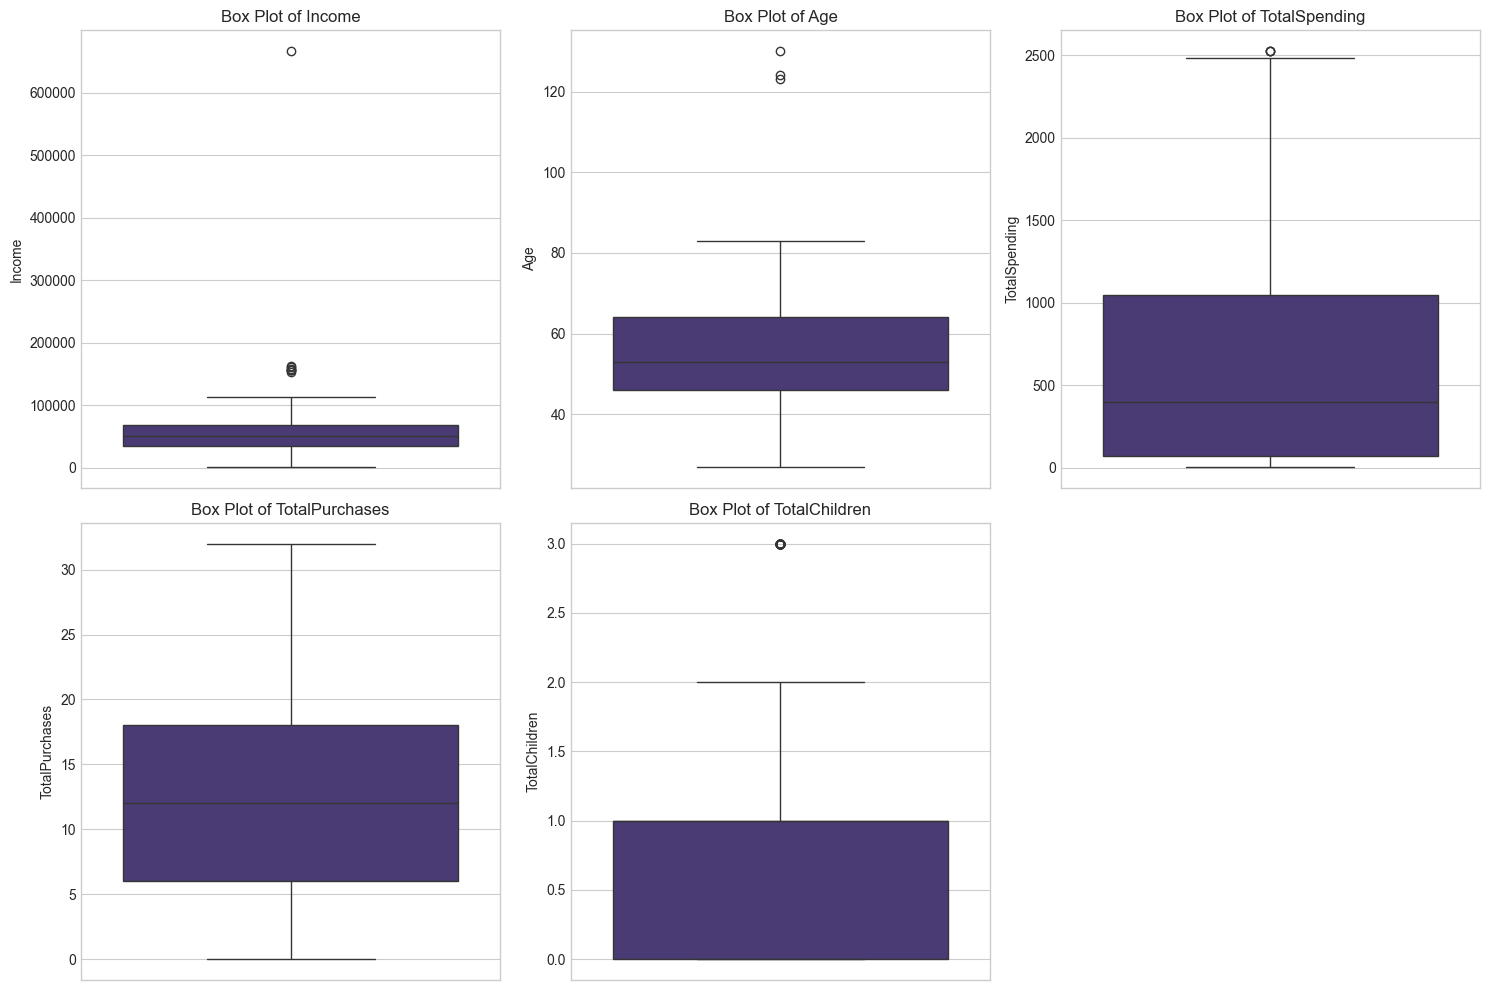

In [35]:
# Box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()

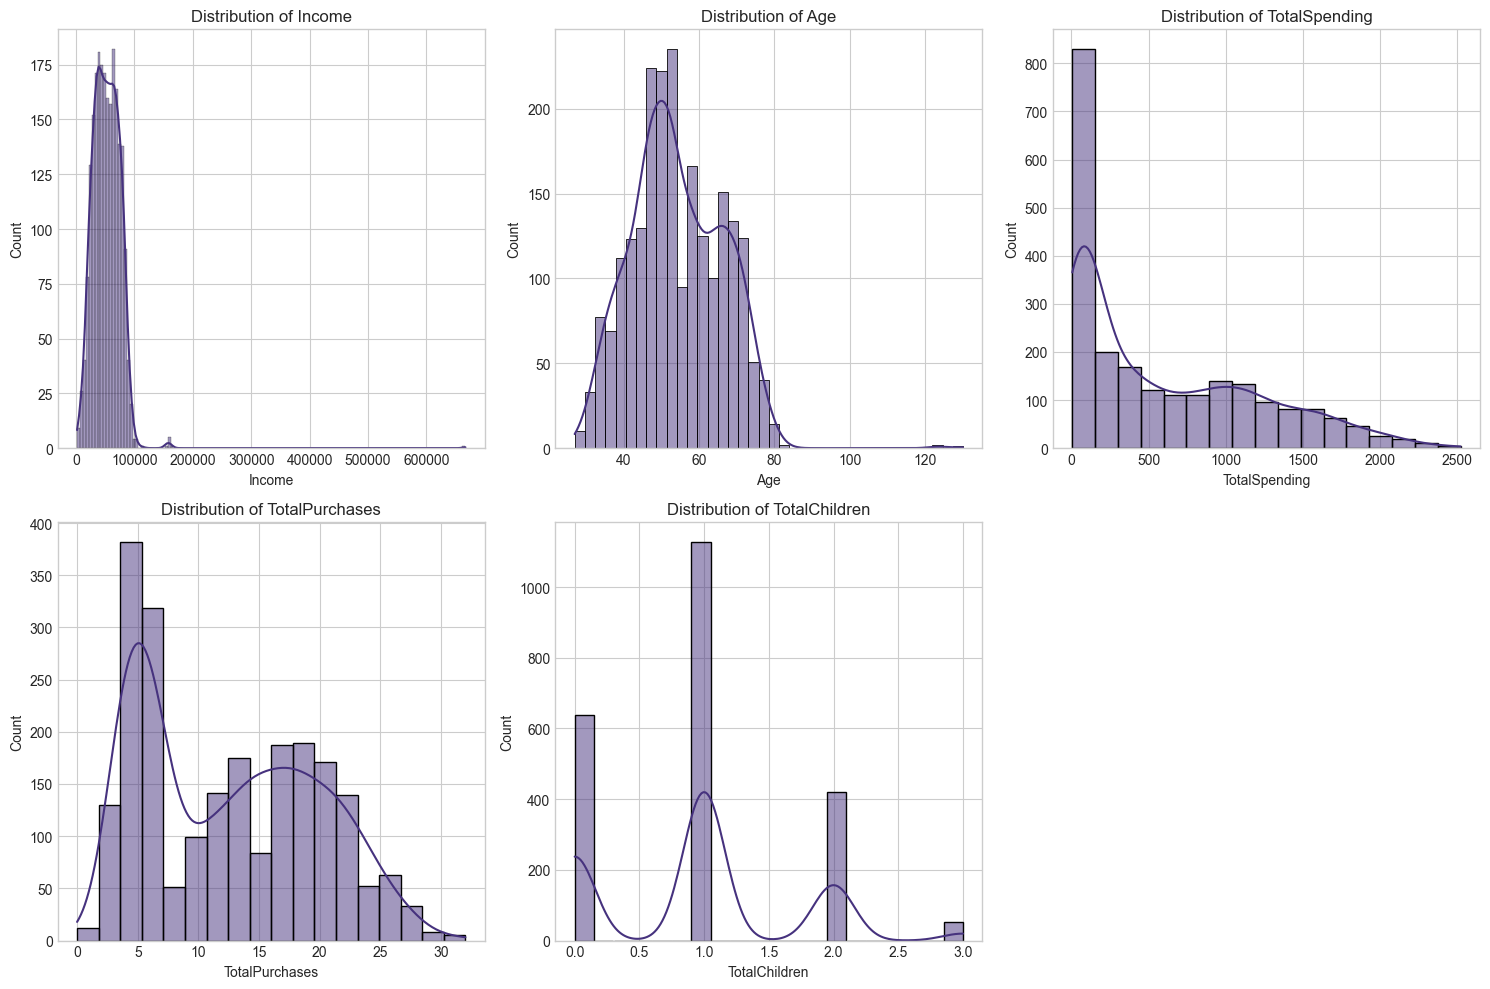

In [36]:
# Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

In [37]:
# Identify outliers using IQR method
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [38]:
# Treat outliers (capping method)
for col in ['Income', 'Age', 'TotalSpending']:
    outliers, lower_bound, upper_bound = identify_outliers(df, col)
    print(f"\nOutliers in {col}: {len(outliers)}")
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


Outliers in Income: 8

Outliers in Age: 3

Outliers in TotalSpending: 3


# 5. Encoding Categorical Variables

In [39]:
# Ordinal encoding for Education
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
df['Education_Ordinal'] = df['Education'].apply(lambda x: education_order.index(x) if x in education_order else -1)

In [40]:
# One-hot encoding for categorical variables
categorical_cols = ['Marital_Status', 'Country']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cats = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))
df = pd.concat([df, encoded_df], axis=1)

# 6. Generate Correlation Heatmap

In [42]:
# Select numerical columns for correlation
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation = numerical_df.corr()

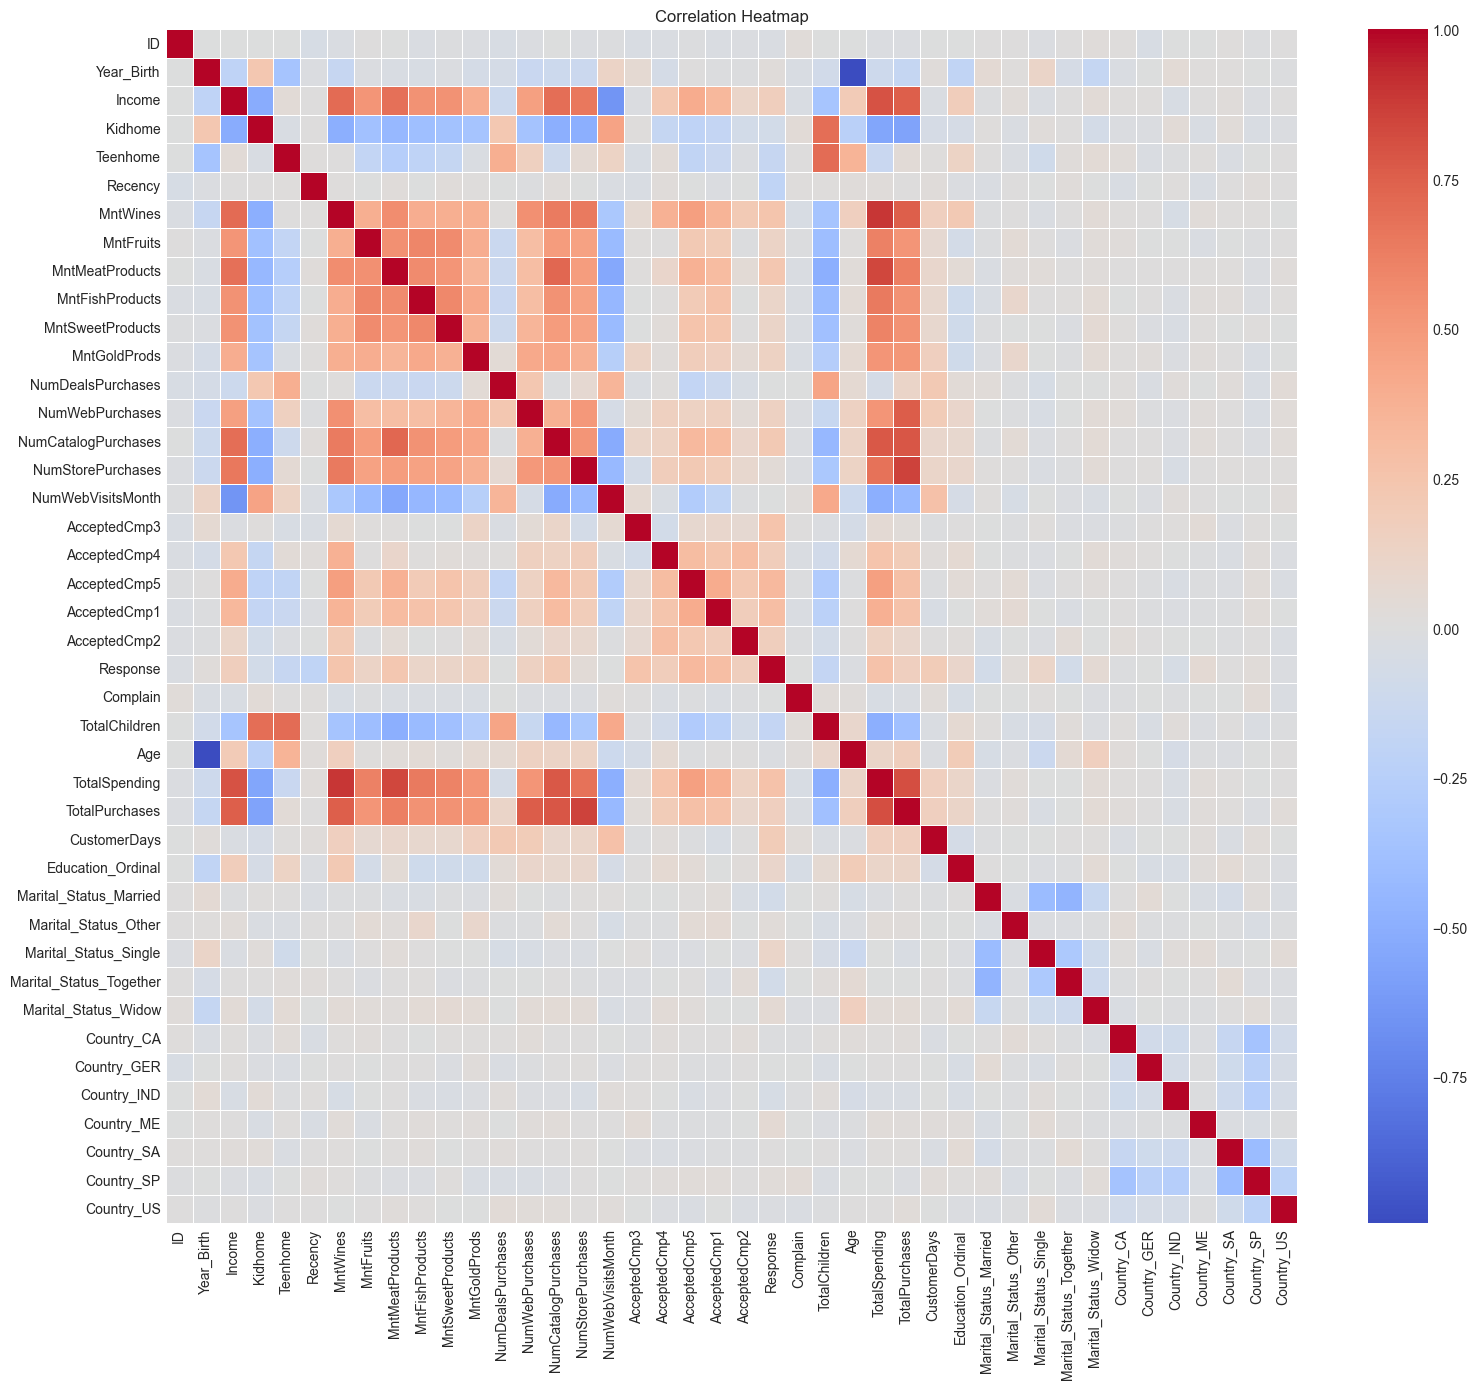

In [43]:
# Plot correlation heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()

# 7. Hypothesis Testing

In [45]:
# a. Older individuals may prefer in-store shopping
print("\nHypothesis a: Older individuals may prefer in-store shopping")
# Define older individuals (above median age)
median_age = df['Age'].median()
df['IsOlder'] = df['Age'] > median_age


Hypothesis a: Older individuals may prefer in-store shopping


In [46]:
# Calculate store purchase ratio
df['StorePurchaseRatio'] = df['NumStorePurchases'] / df['TotalPurchases']

In [47]:
# Perform t-test
older_ratio = df[df['IsOlder']]['StorePurchaseRatio']
younger_ratio = df[~df['IsOlder']]['StorePurchaseRatio']
t_stat, p_value = stats.ttest_ind(older_ratio, younger_ratio, equal_var=False)
print(f"T-test result: t={t_stat:.4f}, p-value={p_value:.4f}")
print(f"Mean store purchase ratio for older customers: {older_ratio.mean():.4f}")
print(f"Mean store purchase ratio for younger customers: {younger_ratio.mean():.4f}")
print(f"Conclusion: {'Reject' if p_value < 0.05 else 'Fail to reject'} null hypothesis")

T-test result: t=nan, p-value=nan
Mean store purchase ratio for older customers: 0.4908
Mean store purchase ratio for younger customers: 0.5188
Conclusion: Fail to reject null hypothesis


Text(0, 0.5, 'Store Purchase Ratio')

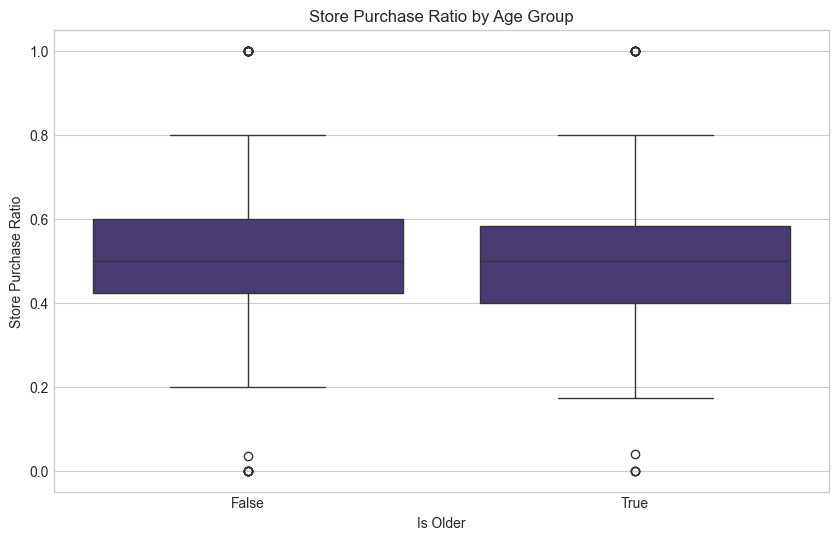

In [48]:
# Visualize
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsOlder', y='StorePurchaseRatio', data=df)
plt.title('Store Purchase Ratio by Age Group')
plt.xlabel('Is Older')
plt.ylabel('Store Purchase Ratio')

In [49]:
# b. Customers with children likely prefer online shopping
print("\nHypothesis b: Customers with children likely prefer online shopping")
# Define customers with children
df['HasChildren'] = df['TotalChildren'] > 0


Hypothesis b: Customers with children likely prefer online shopping


In [50]:
# Calculate web purchase ratio
df['WebPurchaseRatio'] = df['NumWebPurchases'] / df['TotalPurchases']

In [51]:
# Perform t-test
with_children_ratio = df[df['HasChildren']]['WebPurchaseRatio']
without_children_ratio = df[~df['HasChildren']]['WebPurchaseRatio']
t_stat, p_value = stats.ttest_ind(with_children_ratio, without_children_ratio, equal_var=False)
print(f"T-test result: t={t_stat:.4f}, p-value={p_value:.4f}")
print(f"Mean web purchase ratio for customers with children: {with_children_ratio.mean():.4f}")
print(f"Mean web purchase ratio for customers without children: {without_children_ratio.mean():.4f}")
print(f"Conclusion: {'Reject' if p_value < 0.05 else 'Fail to reject'} null hypothesis")

T-test result: t=nan, p-value=nan
Mean web purchase ratio for customers with children: 0.3526
Mean web purchase ratio for customers without children: 0.2726
Conclusion: Fail to reject null hypothesis


Text(0, 0.5, 'Web Purchase Ratio')

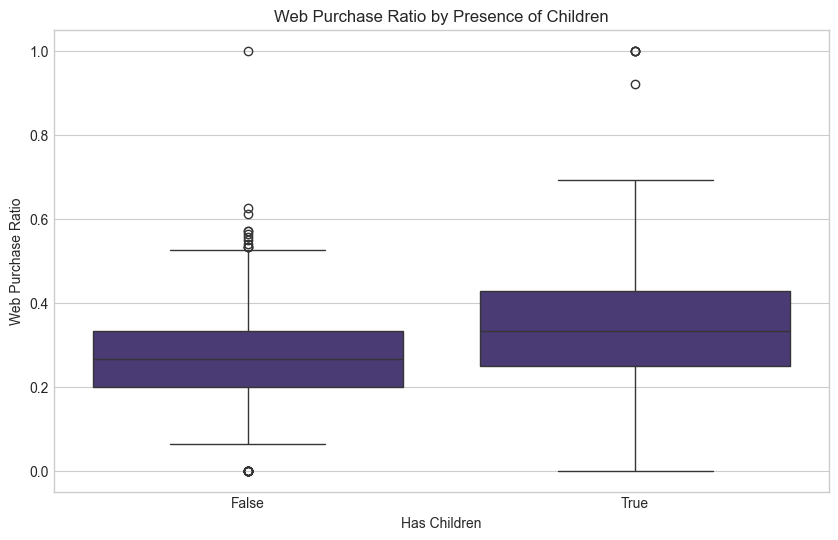

In [52]:
# Visualize
plt.figure(figsize=(10, 6))
sns.boxplot(x='HasChildren', y='WebPurchaseRatio', data=df)
plt.title('Web Purchase Ratio by Presence of Children')
plt.xlabel('Has Children')
plt.ylabel('Web Purchase Ratio')

In [53]:
# c. Sales at physical stores may face cannibalization by alternative channels
print("\nHypothesis c: Sales at physical stores may face cannibalization by alternative channels")
# Calculate correlation between store purchases and other channels
store_web_corr = df['NumStorePurchases'].corr(df['NumWebPurchases'])
store_catalog_corr = df['NumStorePurchases'].corr(df['NumCatalogPurchases'])
print(f"Correlation between store and web purchases: {store_web_corr:.4f}")
print(f"Correlation between store and catalog purchases: {store_catalog_corr:.4f}")


Hypothesis c: Sales at physical stores may face cannibalization by alternative channels
Correlation between store and web purchases: 0.5027
Correlation between store and catalog purchases: 0.5187


Text(0.5, 1.0, 'Store vs Web Purchases')

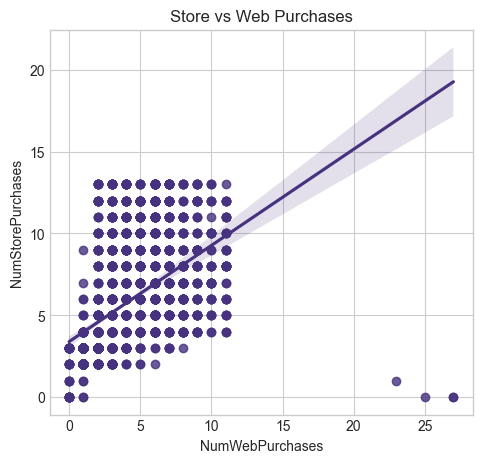

In [54]:
# Visualize
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.regplot(x='NumWebPurchases', y='NumStorePurchases', data=df)
plt.title('Store vs Web Purchases')

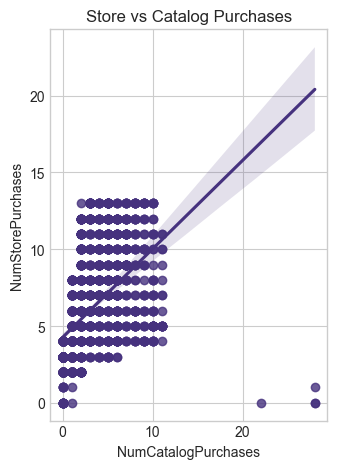

In [55]:
plt.subplot(1, 2, 2)
sns.regplot(x='NumCatalogPurchases', y='NumStorePurchases', data=df)
plt.title('Store vs Catalog Purchases')
plt.tight_layout()

In [56]:
# d. Does the US significantly outperform the rest of the world in total purchase volumes?
print("\nHypothesis d: US outperforms rest of world in total purchase volumes")
# Compare US vs rest of world
df['IsUS'] = df['Country'] == 'US'
us_purchases = df[df['IsUS']]['TotalPurchases']
non_us_purchases = df[~df['IsUS']]['TotalPurchases']
t_stat, p_value = stats.ttest_ind(us_purchases, non_us_purchases, equal_var=False)
print(f"T-test result: t={t_stat:.4f}, p-value={p_value:.4f}")
print(f"Mean total purchases for US customers: {us_purchases.mean():.4f}")
print(f"Mean total purchases for non-US customers: {non_us_purchases.mean():.4f}")
print(f"Conclusion: {'Reject' if p_value < 0.05 else 'Fail to reject'} null hypothesis")


Hypothesis d: US outperforms rest of world in total purchase volumes
T-test result: t=1.4682, p-value=0.1447
Mean total purchases for US customers: 13.5138
Mean total purchases for non-US customers: 12.4871
Conclusion: Fail to reject null hypothesis


Text(0, 0.5, 'Total Purchases')

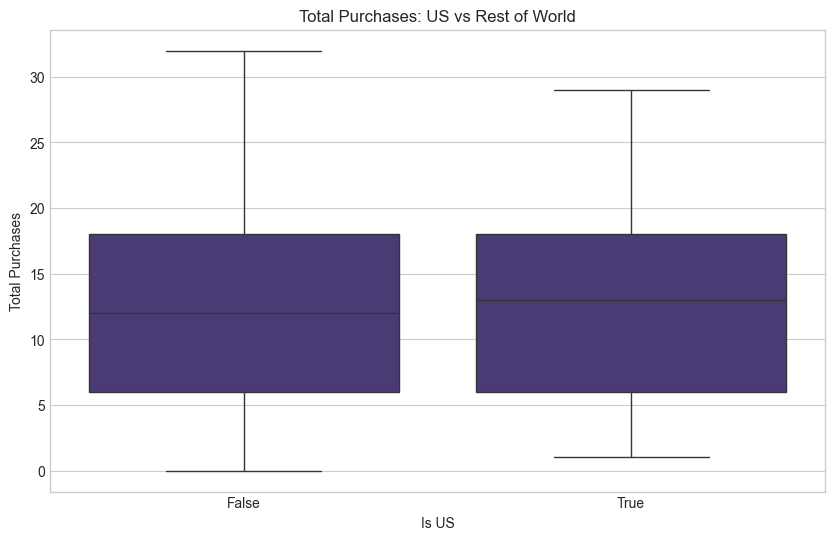

In [57]:
# Visualize
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsUS', y='TotalPurchases', data=df)
plt.title('Total Purchases: US vs Rest of World')
plt.xlabel('Is US')
plt.ylabel('Total Purchases')

# 8. Additional Visualizations for Analysis

In [64]:
# a. Identify top-performing products and those with lowest revenue
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_totals = df[product_cols].sum().sort_values(ascending=False)

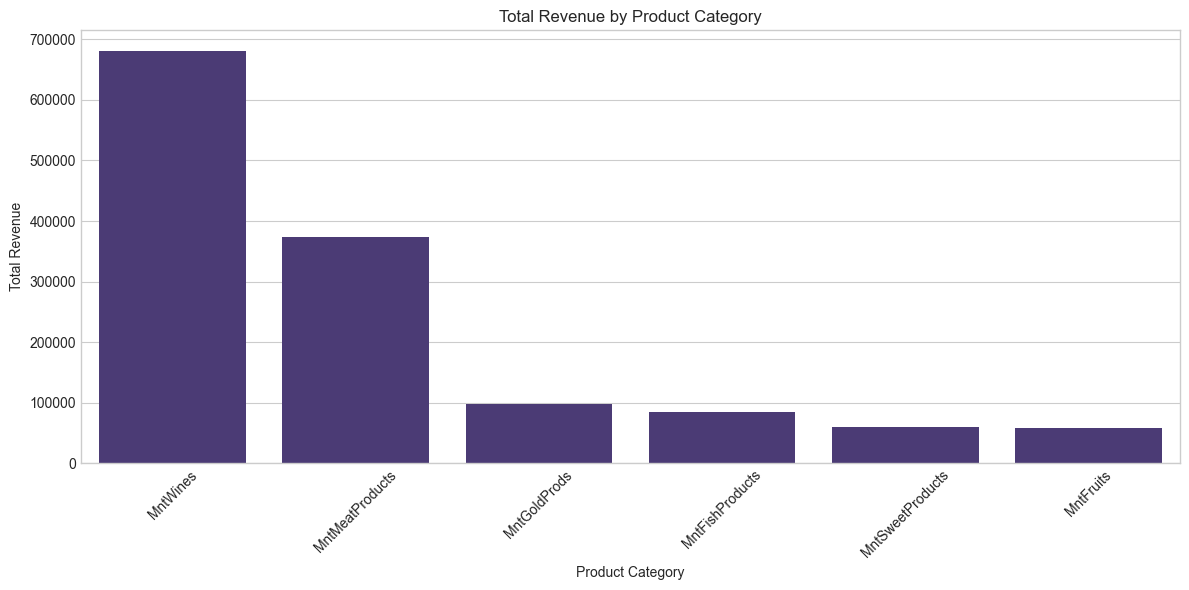

In [65]:
plt.figure(figsize=(12, 6))
sns.barplot(x=product_totals.index, y=product_totals.values)
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()

Text(0, 0.5, 'Age')

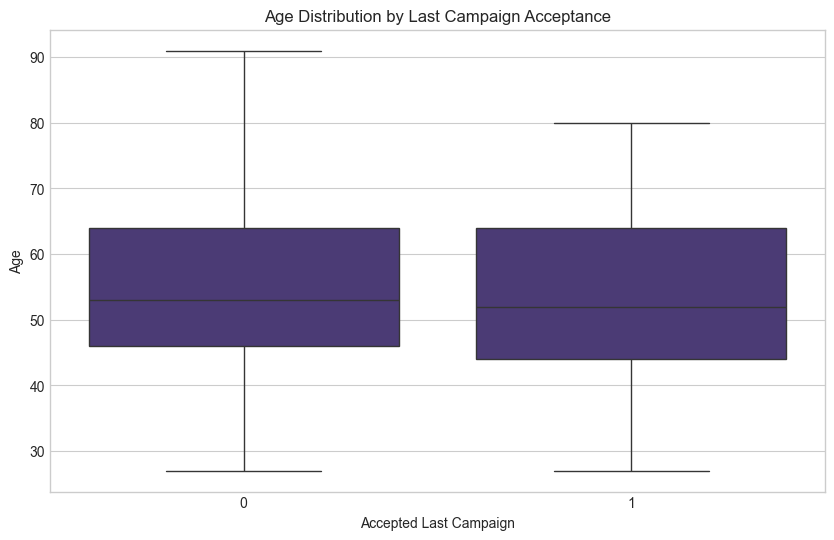

In [62]:
# b. Correlation between age and acceptance rate of last campaign
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Age', data=df)
plt.title('Age Distribution by Last Campaign Acceptance')
plt.xlabel('Accepted Last Campaign')
plt.ylabel('Age')

In [63]:
# Calculate correlation
age_campaign_corr = df['Age'].corr(df['Response'])
print(f"\nCorrelation between Age and Last Campaign Acceptance: {age_campaign_corr:.4f}")


Correlation between Age and Last Campaign Acceptance: -0.0201


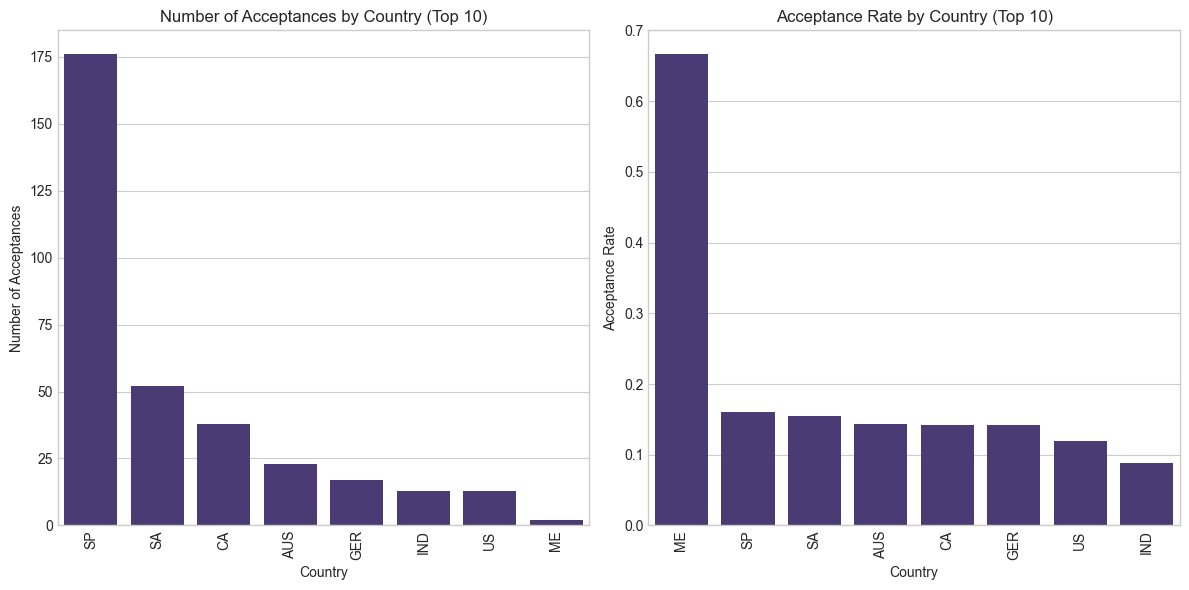

In [66]:
# c. Country with highest number of customers who accepted last campaign
country_acceptance = df.groupby('Country')['Response'].sum().sort_values(ascending=False)
country_acceptance_rate = df.groupby('Country')['Response'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=country_acceptance.index[:10], y=country_acceptance.values[:10])
plt.title('Number of Acceptances by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Number of Acceptances')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=country_acceptance_rate.index[:10], y=country_acceptance_rate.values[:10])
plt.title('Acceptance Rate by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=90)
plt.tight_layout()

Text(0, 0.5, 'Total Spending')

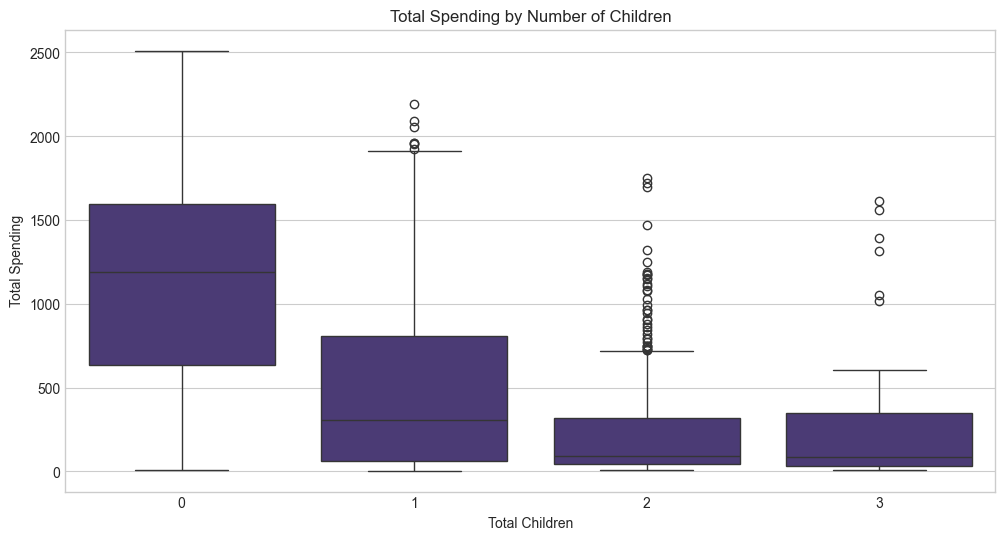

In [67]:
# d. Pattern in number of children at home and total expenditure
plt.figure(figsize=(12, 6))
sns.boxplot(x='TotalChildren', y='TotalSpending', data=df)
plt.title('Total Spending by Number of Children')
plt.xlabel('Total Children')
plt.ylabel('Total Spending')

In [68]:
# Calculate correlation
children_spending_corr = df['TotalChildren'].corr(df['TotalSpending'])
print(f"\nCorrelation between Total Children and Total Spending: {children_spending_corr:.4f}")


Correlation between Total Children and Total Spending: -0.4989


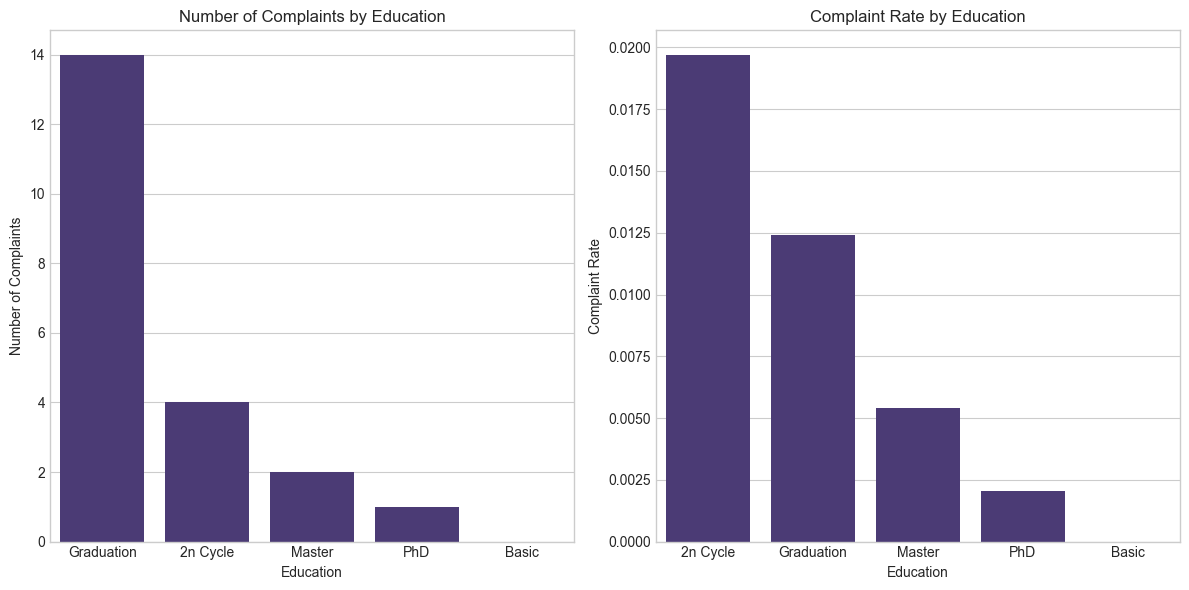

In [70]:
# e. Educational background of customers who lodged complaints
complaint_by_education = df.groupby('Education')['Complain'].sum().sort_values(ascending=False)
complaint_rate_by_education = df.groupby('Education')['Complain'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=complaint_by_education.index, y=complaint_by_education.values)
plt.title('Number of Complaints by Education')
plt.xlabel('Education')
plt.ylabel('Number of Complaints')

plt.subplot(1, 2, 2)
sns.barplot(x=complaint_rate_by_education.index, y=complaint_rate_by_education.values)
plt.title('Complaint Rate by Education')
plt.xlabel('Education')
plt.ylabel('Complaint Rate')
plt.tight_layout()

# 9. Recommendations

**Product Strategy**
1. **Focus on wine category**: Given that wines generate the highest revenue, consider expanding the wine product line and creating special promotions around wine products.
2. **Improve low-performing categories**: Develop strategies to boost sales of fruits and sweet products, such as bundling them with high-performing products or creating targeted promotions.

**Channel Strategy**
1. **Integrated omnichannel approach**: Since sales channels appear to be complementary rather than cannibalizing, develop an integrated omnichannel strategy that encourages customers to engage across multiple channels.
2. **Enhanced online experience for parents**: Given that customers with children show a higher preference for online shopping, optimize the web experience specifically for parents with features like saved shopping lists, quick reordering, and family-oriented product recommendations.

**Customer Segmentation**
1. **Family-focused value propositions**: Develop special value propositions for families with children, recognizing the negative correlation between number of children and total spending. Consider family bundles or loyalty programs that offer increasing benefits with spending.
2. **Education-based targeting**: Use the insights about complaint patterns across education levels to tailor customer service approaches and communication styles for different educational segments.

**Campaign Optimization**
1. **Country-specific campaigns**: Develop targeted campaigns for countries with the highest acceptance rates, leveraging local preferences and cultural factors.
2. **Age-neutral campaign design**: Given the weak correlation between age and campaign acceptance, focus on other factors beyond age when designing campaigns, such as purchase history, product preferences, or channel behavior.